In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [9]:
#Read the file
df = pd.read_excel('/Users/ajithkhan/Downloads/California housing .xlsx')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


#### 1. DATA UNDERSTANDING 

In [13]:
#Number of rows and columns
df.shape

(20640, 10)

In [14]:
#Sample 
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5904,-118.43,34.29,39,1769,410.0,1499,390,3.1212,<1H OCEAN,153500
7998,-118.16,33.85,36,1979,339.0,952,339,4.0815,<1H OCEAN,216200
2759,-115.51,32.68,11,2872,610.0,2644,581,2.6250,INLAND,72700
13058,-121.27,38.61,17,6663,1369.0,2840,1299,2.9452,INLAND,115600
15087,-116.93,32.82,26,4129,714.0,1820,718,4.2586,<1H OCEAN,171000


In [15]:
#Data types 
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [18]:
#Checking if there are any null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

##### total_bedrooms column have 207 null values 

In [19]:
#The distribution of the data 
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### Looks like there are outliers in the data 

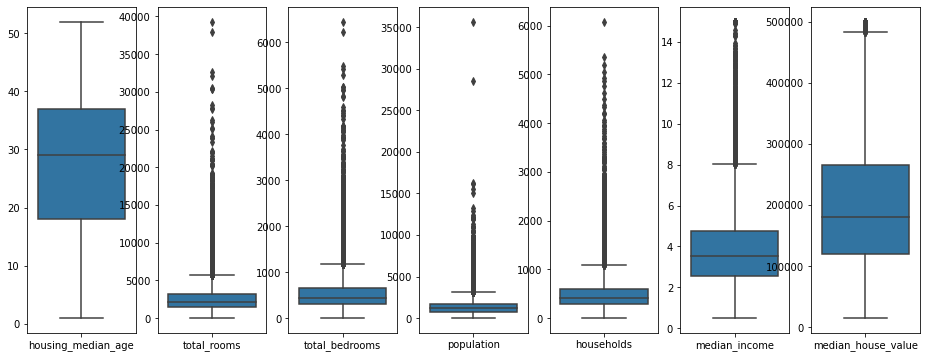

In [24]:
#Lets visualise the outliers through box plot
fig, axis = plt.subplots(nrows=1, ncols=7, figsize=(16, 6))

sns.boxplot(data=df[['housing_median_age']], ax=axis[0]);
sns.boxplot(data=df[['total_rooms']],        ax=axis[1]);
sns.boxplot(data=df[['total_bedrooms']],     ax=axis[2]);
sns.boxplot(data=df[['population']],         ax=axis[3]);
sns.boxplot(data=df[['households']], ax=axis[4]);
sns.boxplot(data=df[['median_income']], ax=axis[5]);
sns.boxplot(data=df[['median_house_value']], ax=axis[6]); 

##### It is cleared that total_rooms, total_bedrooms, population, households, median_income have many outliers

##### This also shows that the data were skewed 

#### 2. HANDLING THE NULLS

**Treating the Nulls**
- we can drop the rows where the total_bedrooms is NULL
- we can take mean/median of total_bedrooms 


In [25]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

In [26]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

#### 3. HANDLING THE CATEGORICAL COLUMN


In [29]:
#The ocean_proximity column is the categorical column. Lets use the value_counts() to find the unique values
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [31]:
#Lets assign a value for all these categories.

#Before that, make a copy of the dataset
df_new = df.copy()

#Convert the ocean_proximity into a categorical column
df_new['ocean_proximity'] = df_new['ocean_proximity'].astype('category')

#Label the categories using .cat.codes function
df_new['ocean_proximity'] = df_new['ocean_proximity'].cat.codes
df_new

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1,84700


#### 4. SPLITTING THE DATA

In [40]:
#Assigning X and y from the data. 

X = df_new.drop(['median_house_value'], axis=1)
y = df_new['median_house_value']

In [41]:
#Split the data into 80% training dataset and 20% test dataset.
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=4)

#### 5. STANDARDIZE TEST AND TRAIN DATA 

In [43]:
#Initiate the Scaler 
scaler = StandardScaler()

In [47]:
#Fit and transform the data
a = scaler.fit_transform(Xtrain)
b = scaler.fit_transform(Xtest)

#### 6. PERFORMING LINEAR REGRESSION

In [48]:
#Initiate the model and fit the data
lr = LinearRegression()
lr.fit(a,ytrain)

LinearRegression()

In [49]:
#Prediction
ypred = lr.predict(b)

In [53]:
#Room mean square value 
print('Root mean square error:', np.sqrt(metrics.mean_squared_error(ytest,ypred)))

Root mean square error: 70429.91101367155


In [55]:
#R square value 
print('R square value:', metrics.r2_score(ytest,ypred))

R square value: 0.6186747912447856
